In [1]:
##Before anything, set your working directory
import os
os.chdir("C:/Users/user/Desktop/Adult Salary")

os.getcwd()

'C:\\Users\\user\\Desktop\\Adult Salary'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches

# Import sys and warnings to ignore warning messages 
import sys
import warnings

%matplotlib inline

pd.set_option("display.max.columns", None)

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [3]:
## We read in the excel data file

Salary = pd.read_csv("adult.csv")

Salary.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
print(len(Salary))
print(Salary.shape)

48842
(48842, 15)


#### In the preceding cell the first line of code outputs the length of the data set which corresponds to the number of rows in the data. The second line gives us the full dimension of the data which is made up of 48842 rows and 15 columns

In [45]:
##We investigate further to know the various data types of the respective columns

Salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
##Obtain summary statistics of the data

print(Salary.describe())
print(Salary.describe(include = np.object))

##Or you can use print(Salary.describe(include = 'all')) to list summary statistics of all variables at a go

                age        fnlwgt  educational-num  capital-gain  \
count  48842.000000  4.884200e+04     48842.000000  48842.000000   
mean      38.643585  1.896641e+05        10.078089   1079.067626   
std       13.710510  1.056040e+05         2.570973   7452.019058   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.175505e+05         9.000000      0.000000   
50%       37.000000  1.781445e+05        10.000000      0.000000   
75%       48.000000  2.376420e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  48842.000000    48842.000000  
mean      87.502314       40.422382  
std      403.004552       12.391444  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000  
       workclass education      marital-statu

#### The above is a summary of the data. The first command prints out summary or descriptive statistics of continuous variables in the data while a little tweak of the first code yields summary statistics of categorical (or more precisely, pandas object) data. The summary includes counts, number of unique values, top and frequency of those values.

In [33]:
Salary.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [34]:
Salary.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [5]:
##Noticed earlier the presence of a special character, so we investigate this further

Salary.isin(['?']).sum(axis=0)

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

#### The above shows that there exists in some columns the presence of special characters '?' in the variables 'workclass', 'occupation' and 'native-country'. These we shall replace with the Numpy null or nan value to replace the special character

In [6]:
Salary['workclass'] = Salary['workclass'].replace('?', np.nan)
Salary['occupation'] = Salary['occupation'].replace('?', np.nan)
Salary['native-country'] = Salary['native-country'].replace('?', np.nan)

In [7]:
Salary.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [8]:
##drop all the resulting null values
Salary.dropna(how = 'any', inplace = True)

print(Salary.shape)

(45222, 15)


#### After the null values are dropped, the data is reduced by 3620 rows as those records contain missing values which isnt of much help in our analysis. There are other methods too to solve the problem of missing values but considering the small size of the dropped records we can afford to use this method.

In [9]:
## For convenience we shall rename some columns

Salary.rename(columns = {'educational-num': 'education rank', 'marital-status': 'marital status',
                        'capital-gain': 'capital gain', 'capital-loss': 'capital loss', 'hours-per-week': 'HPW',
                        'native-country': 'country', 'fnlwgt': 'Final Weight'}, inplace = True)

## Exploratory Data Analysis (EDA)

In [10]:
Salary.columns

Index(['age', 'workclass', 'Final Weight', 'education', 'education rank',
       'marital status', 'occupation', 'relationship', 'race', 'gender',
       'capital gain', 'capital loss', 'HPW', 'country', 'income'],
      dtype='object')

In [26]:
##To find out the value count of all the variables in the data we run a loop through the data

#for c in Salary.columns:
#    print("----%s----" %c)
#    print(Salary[c].value_counts())

### Univariate Analysis

#### Univariate analysis means carrying out exploratory analysis, on all or the most important variables

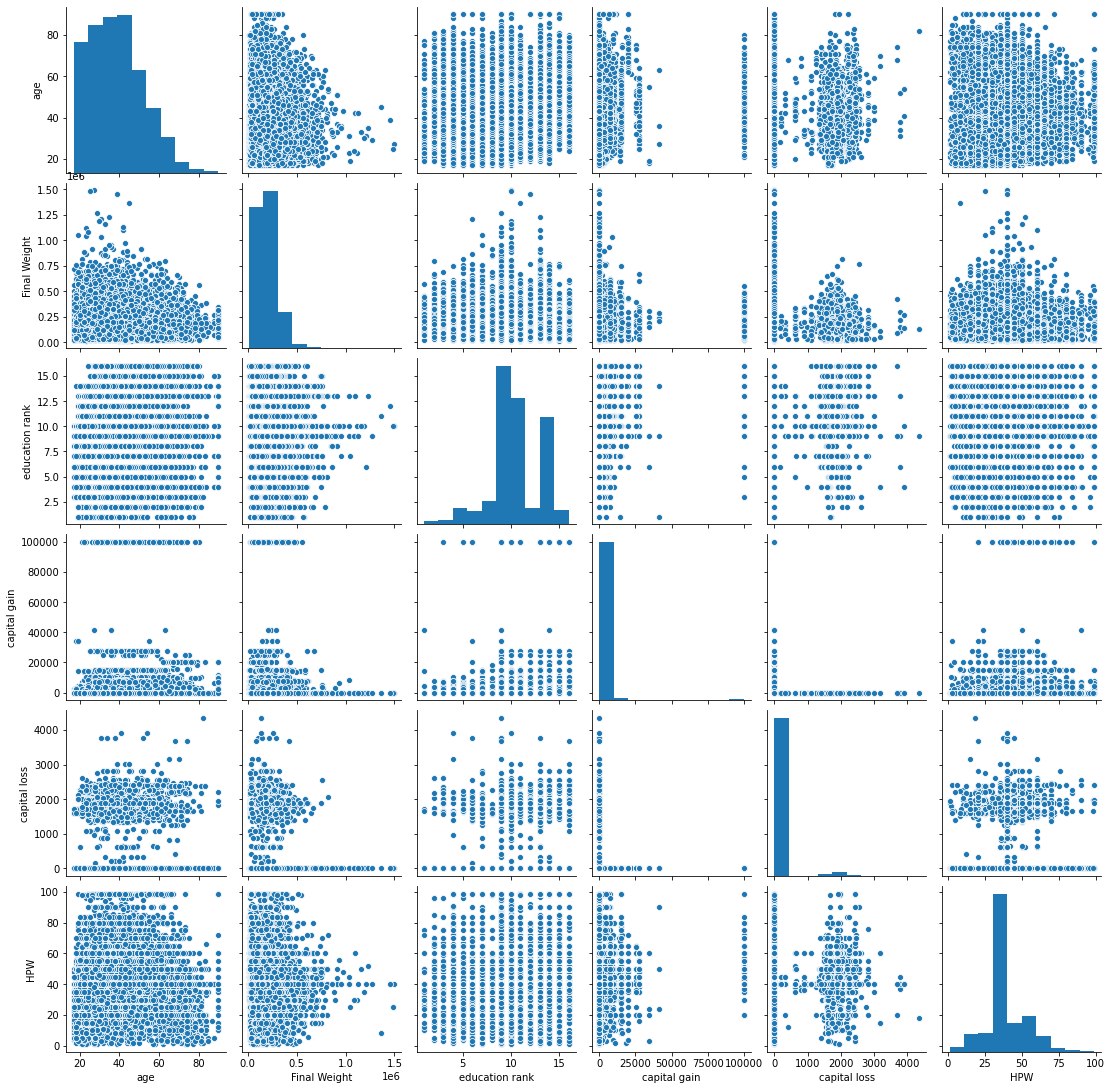

In [29]:
##First we start with a visualization of all continuous variables in the data

sns.pairplot(Salary)

36    1283
33    1279
31    1274
35    1272
23    1241
      ... 
85       5
88       5
86       1
87       1
89       1
Name: age, Length: 74, dtype: int64


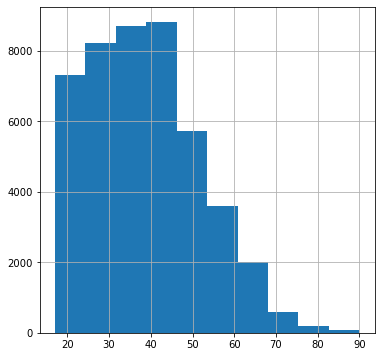

In [11]:
print(Salary['age'].value_counts())

Salary['age'].hist(figsize = (6, 6))

In [12]:
Salary['age'].skew()

0.5328158942555791

#### The age variable is an assymetric distribution with right skew and ranges from 17 to 90

203488    21
125892    18
120277    18
113364    17
126569    17
          ..
88440      1
176517     1
194956     1
201105     1
208174     1
Name: Final Weight, Length: 26741, dtype: int64


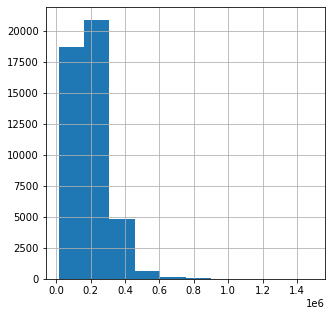

In [13]:
##Next we look at the 'Final Weight' variable

print(Salary['Final Weight'].value_counts())

Salary['Final Weight'].hist(figsize = (5,5))
plt.show()

#### This is another assymetric right-tailed distribution

### Distribution of the workclass variable

Federal-gov         0.031091
Local-gov           0.068551
Self-emp-not-inc    0.083941
Private             0.736522
Self-emp-inc        0.036398
State-gov           0.043032
Without-pay         0.000464
Name: workclass, dtype: float64


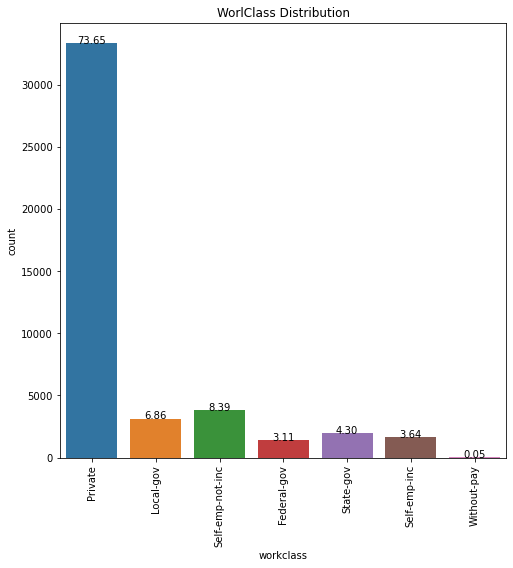

In [30]:
print(Salary['workclass'].value_counts( sort = False, normalize = True))

plt.figure(figsize=(8,8))

total = float(len(Salary['income']))

a = sns.countplot(x='workclass',data = Salary)

a.set_xticklabels(a.get_xticklabels(), rotation = 90)

for f in a.patches:
    height = f.get_height()
    a.text(f.get_x() + f.get_width()/2., height+3, '{:1.2f}'.format((height/total)*100),ha="center")

plt.title("WorlClass Distribution")
plt.show()

#### Private sector employees accounted for an overwhelming majority (73.65%) of the data followed by those who are self employed but not yet incorporated their business in distant second (8.39%), and those without any source of income being the smallest group(0.05%)

### Distribution of Education Level

HS-grad         0.326898
Some-college    0.218898
Bachelors       0.167396
Masters         0.055592
Assoc-voc       0.043320
11th            0.035801
Assoc-acdm      0.033324
10th            0.027044
7th-8th         0.018199
Prof-school     0.017359
9th             0.014948
12th            0.012759
Doctorate       0.012030
5th-6th         0.009929
1st-4th         0.004909
Preschool       0.001592
Name: education, dtype: float64


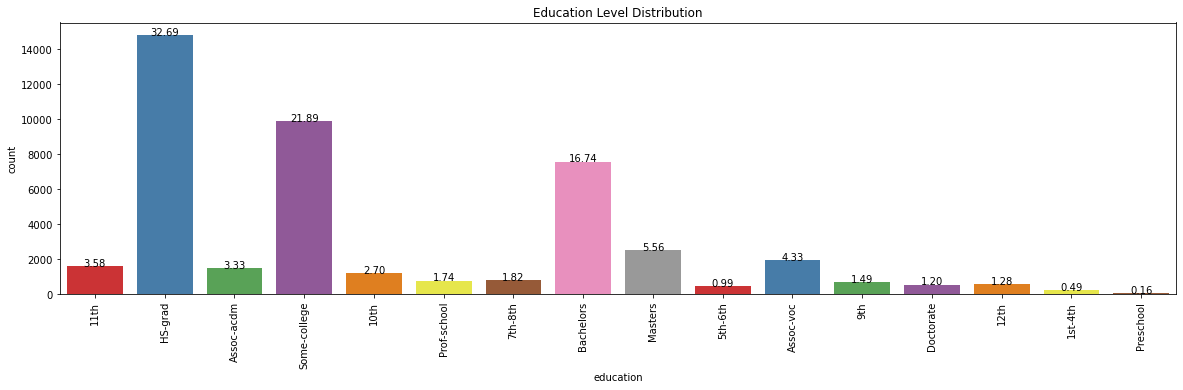

In [29]:
print(Salary['education'].value_counts(normalize = True))


plt.figure(figsize=(20,5))


tot = float(len(Salary))

a1 = sns.countplot(Salary['education'], palette = 'Set1')
a1.set_xticklabels(a1.get_xticklabels(), rotation = 90)

for s in a1.patches:
    height = s.get_height()
    a1.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')
    
plt.title("Education Level Distribution")
plt.show()  

#### 32.69% of those that made up this data had graduated High School, followed closely by those got some form of college education(21.89%), while those who had only Preschool education made up the smallest of the group(0.16%)

### Marital Status

Married-civ-spouse       0.465592
Never-married            0.322807
Divorced                 0.139246
Separated                0.031202
Widowed                  0.028238
Married-spouse-absent    0.012206
Married-AF-spouse        0.000708
Name: marital status, dtype: float64


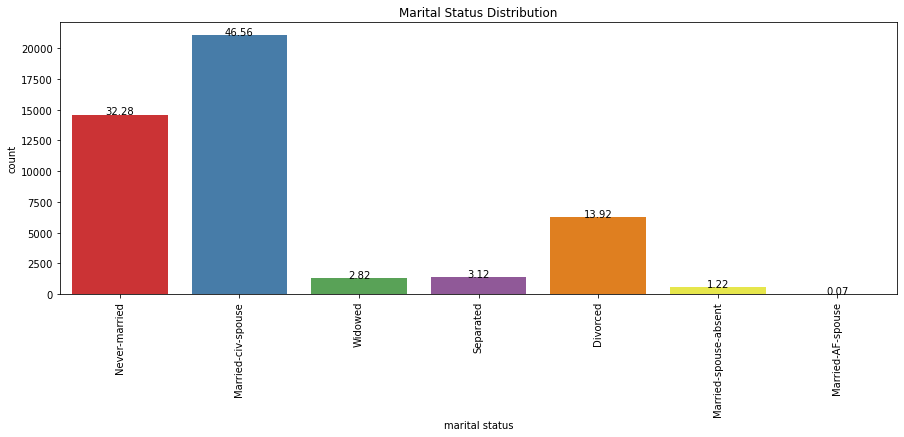

In [28]:
print(Salary['marital status'].value_counts(normalize = True))


plt.figure(figsize=(15,5))



tot = float(len(Salary))

ax = sns.countplot(Salary['marital status'], palette = 'Set1')

ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

for s in ax.patches:
    height = s.get_height()
    ax.text(s.get_x() + s.get_width()/2.,height + 3,'{:1.2f}'.format((height/total)*100),ha='center')
    
plt.title("Marital Status Distribution")
plt.show()


#### Those that fell into the 'Married-civ-spouse' category accounted for almost have of the total number of respondents(46.56%), followed by those who were never married (32.28%), 'Divorced' made up the third largest group (13.92%) and the least group were the  'Married-AF-spouse' category (0.07%)

### Occupation Distribution

Craft-repair         0.133121
Prof-specialty       0.132856
Exec-managerial      0.132325
Adm-clerical         0.122507
Sales                0.119588
Other-service        0.106320
Machine-op-inspct    0.065676
Transport-moving     0.051214
Handlers-cleaners    0.045243
Farming-fishing      0.032727
Tech-support         0.031401
Protective-serv      0.021582
Priv-house-serv      0.005130
Armed-Forces         0.000310
Name: occupation, dtype: float64


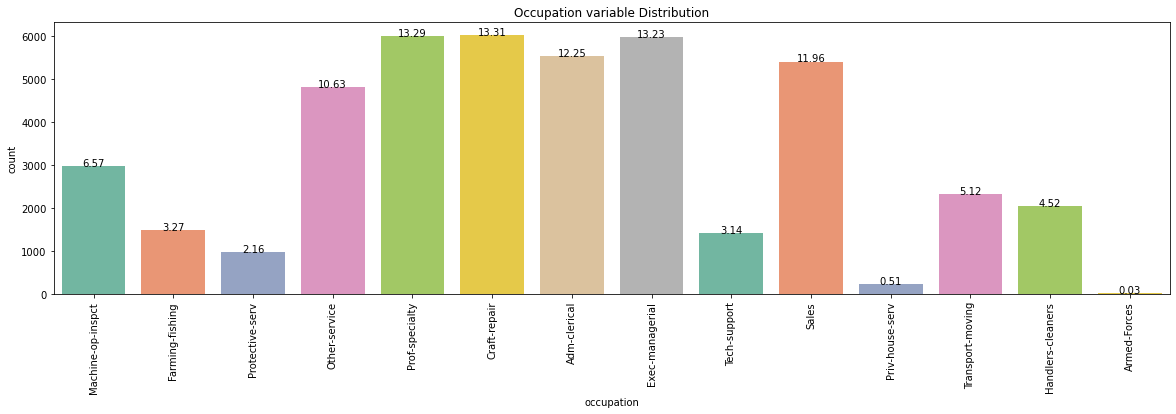

In [45]:
print(Salary['occupation'].value_counts(normalize = True))


plt.figure(figsize=(20,5))


tot = float(len(Salary))

ay = sns.countplot(Salary['occupation'], palette = 'Set2')
ay.set_xticklabels(ay.get_xticklabels(), rotation = 90)

for s in ay.patches:
    height = s.get_height()
    ay.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')
    
plt.title('Occupation variable Distribution')
plt.show()


#### Craft-repair accounts for 13.31% of the total occupation reported closely by Prof (13.29%), Exec-managerial (13.23%) and Adm-cleric (12.25%) with the smallest group being the armed forces(0.03%)

### Realationship variable Distribution

Husband           0.412764
Not-in-family     0.258768
Own-child         0.146522
Unmarried         0.105878
Wife              0.046239
Other-relative    0.029831
Name: relationship, dtype: float64


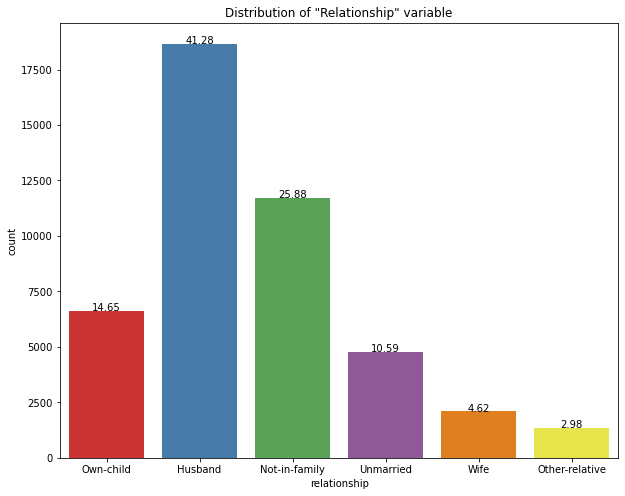

In [52]:
print(Salary['relationship'].value_counts(normalize = True))


plt.figure(figsize=(10,8))


tot = float(len(Salary))

az = sns.countplot(Salary['relationship'], palette = 'Set1')
#az.set_xticklabels(az.get_xticklabels(), rotation = 90)

for s in az.patches:
    height = s.get_height()
    az.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')
    
plt.title('Distribution of "Relationship" variable')
plt.show()


#### The above is a look into the 'realtionship' variable, with Husbands accounting 41.28%, followed by Not-in-family (25.88%), with Other-relative being the least(2.98%)

### Race

White                 0.860267
Black                 0.093494
Asian-Pac-Islander    0.028813
Amer-Indian-Eskimo    0.009619
Other                 0.007806
Name: race, dtype: float64


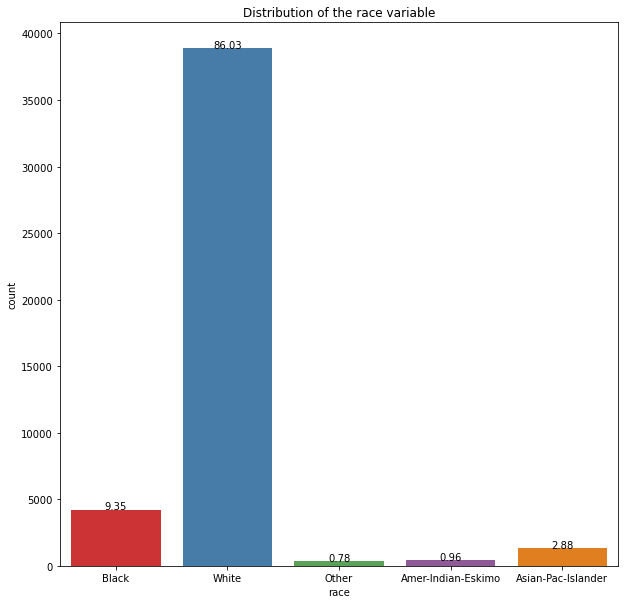

In [57]:
print(Salary['race'].value_counts(normalize = True))


plt.figure(figsize=(10,10))


tot = float(len(Salary))

aj = sns.countplot(Salary['race'], palette = 'Set1')
#aj.set_xticklabels(aj.get_xticklabels(), rotation = 90)

for s in aj.patches:
    height = s.get_height()
    aj.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')
    
plt.title("Distribution of the race variable")
plt.show()


#### Majority of respondents (86.03%) were White, followed by Black (9.35%)

### Gender:

Male      0.675048
Female    0.324952
Name: gender, dtype: float64


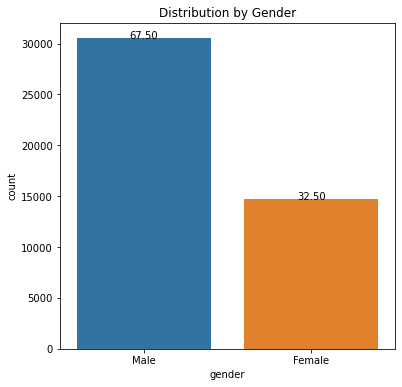

In [58]:
print(Salary['gender'].value_counts(normalize = True))


plt.figure(figsize=(6,6))


tot = float(len(Salary))

ap = sns.countplot(Salary['gender'])
#ap.set_xticklabels(ap.get_xticklabels(), rotation = 90)

for s in ap.patches:
    height = s.get_height()
    ap.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')
    
plt.title('Distribution by Gender')
plt.show()


#### 67.5% of respondents were male while 32.5% were female

### Income

#### This is our target or dependent variable

<=50K    0.752156
>50K     0.247844
Name: income, dtype: float64


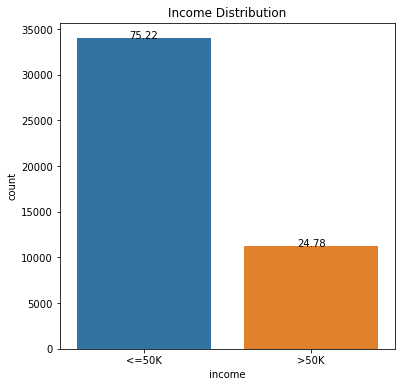

In [61]:
print(Salary['income'].value_counts(normalize = True))


plt.figure(figsize=(6,6))


tot = float(len([Salary]))

ab = sns.countplot(Salary['income'])
#ab.set_xticklabels(ab.get_xticklabels(), rotation = 90)

for s in ab.patches:
    height = s.get_height()
    ab.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')
    
plt.title("Income Distribution")
plt.show()


#### There are 3times more respondents who earn 50000 dollars or less than those who earned above 50000 dollars

## Bivariate Analysis


#### Here we look at our different dependent variables and how they affect our target variable (income)

### Income Vs Age

Text(0.5, 1.0, 'Income distribution by Age')

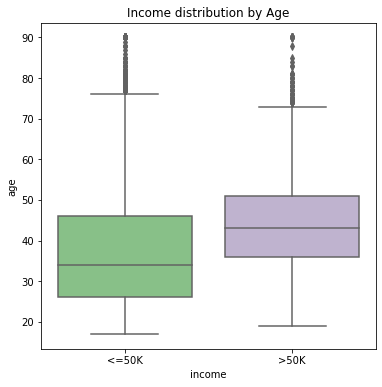

In [79]:
fig = plt.figure(figsize = (6,6))
sns.boxplot(x = 'income', y = 'age', data = Salary, palette = "Accent").set_title("Income distribution by Age")


Text(0.5, 1.0, 'Violin Plot of Age by Income')

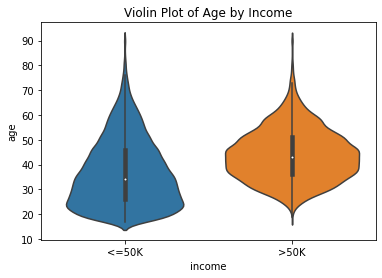

In [105]:
##Alternatively we can represent the above plot using a violin plot

sns.violinplot(x = 'income', y = 'age', data = Salary, size = 6)
plt.title('Violin Plot of Age by Income')

#### There is much variability between those who earn less than 50000 dollars and those who earn higher across ages. The median age for those who earn less than 50000 dollars is 34 while the median age of those who earn higher is 43

In [75]:
##Just for confirmation sake, we check the median age across income brackets

print(Salary.loc[Salary['income'] == '<=50K', 'age'].median())
print(Salary.loc[Salary['income'] == '>50K', 'age'].median())

34.0
43.0


### Income Vs WorkClass

workclass  Federal-gov  Local-gov  Private  Self-emp-inc  Self-emp-not-inc  \
income                                                                       
<=50K              857       2185    26056           734              2737   
>50K               549        915     7251           912              1059   

workclass  State-gov  Without-pay  
income                             
<=50K           1426           19  
>50K             520            2  


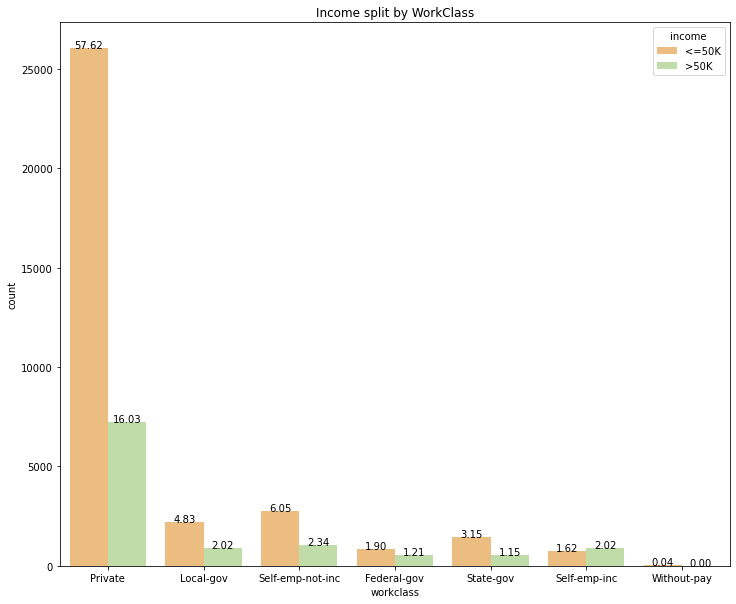

In [104]:
print(pd.crosstab(Salary['income'], Salary['workclass']))

fig = plt.figure(figsize = (12,10))
ad = sns.countplot(x = 'workclass', hue = 'income', data = Salary, palette = "Spectral")

#ad.set_xticklabels(ad.get_xticklabels(), rotation = 90)

for s in ad.patches:
    height = s.get_height()
    ad.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')

plt.title('Income split by WorkClass')
plt.show()

#### The private sector accounts for the overwhelming number of those that earn below 50,000 dollars (26056), and also accounts for majority of those that earn above 50,000 dollars. Those in the without pay category account for the least across both income brackets.

### Income Vs Relationship

relationship  Husband  Not-in-family  Other-relative  Own-child  Unmarried  \
income                                                                       
<=50K           10159          10474            1299       6521       4486   
>50K             8507           1228              50        105        302   

relationship  Wife  
income              
<=50K         1075  
>50K          1016  


Text(0.5, 1.0, 'Income by Relationship')

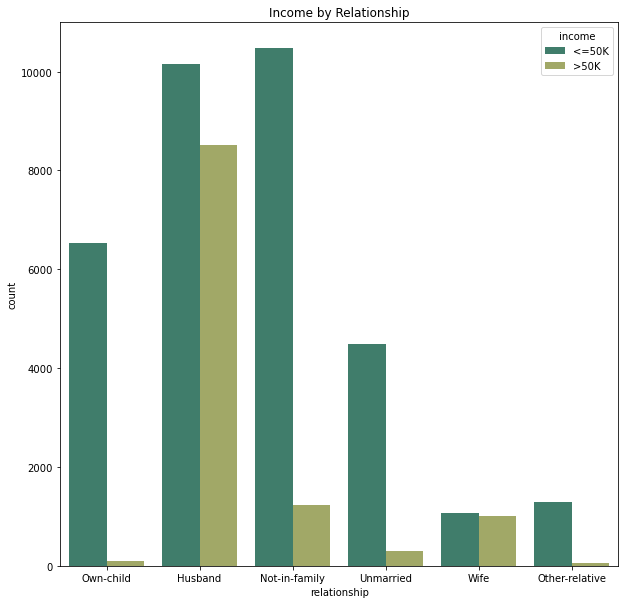

In [88]:
print(pd.crosstab(Salary['income'], Salary['relationship']))

plt.figure(figsize = (10, 10))
sns.countplot(x = 'relationship', hue = 'income', data = Salary, palette = "gist_earth").set_title('Income by Relationship')

#### Across different relationship sub-category there are more of employees earning less than 50,000 dollars, with 'Not-in-family', 'Husband' and 'Own-child' accounting for the majority, while the Husband sub-category accounts for majority of earners above 50,000

### Distribution of Income by Race and Gender

<Figure size 1440x576 with 0 Axes>

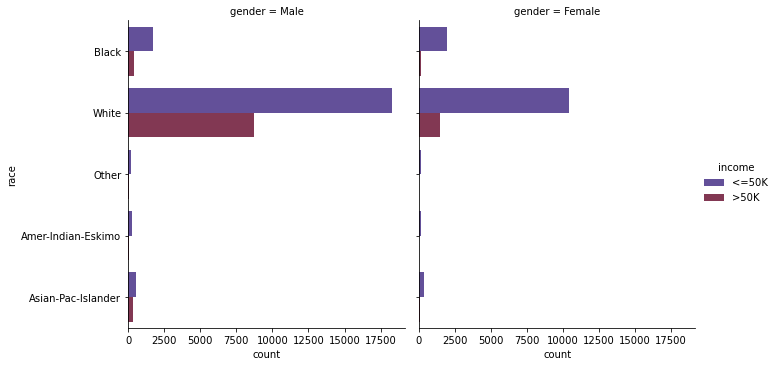

In [101]:
plt.figure(figsize = (20, 8))

sns.catplot(y = 'race', hue = 'income', col = 'gender', data = Salary, kind = 'count', palette = 'twilight')
#plt.title('Income by Race across Gender')

#### As expected Whites account for majority of those earning 50,000 and below, and also above 50,000 across genders. Blacks come a distant second 

### Income by Occupation and Gender

<Figure size 720x720 with 0 Axes>

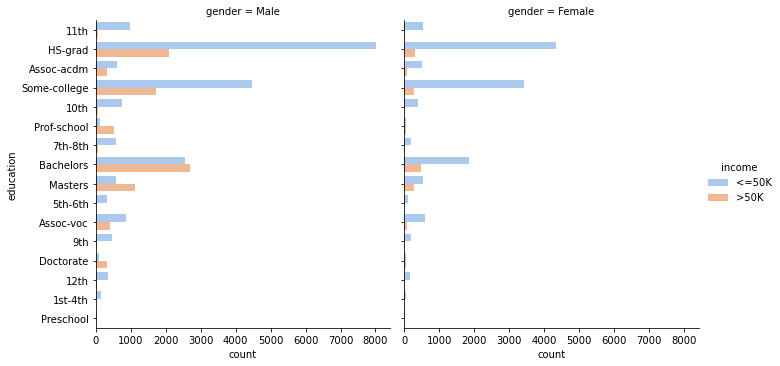

In [109]:
plt.figure(figsize = (10,10))

sns.catplot(y = 'education', hue = 'income', data = Salary, kind = 'count', col = 'gender', palette = 'pastel')


#### High School graduates account for the huge majority of 50,000 or less earners across genders, While the Bachelors Degree holders account for more the above 50,000 earners across genders

### Income by Marital Status and Gender

<Figure size 576x576 with 0 Axes>

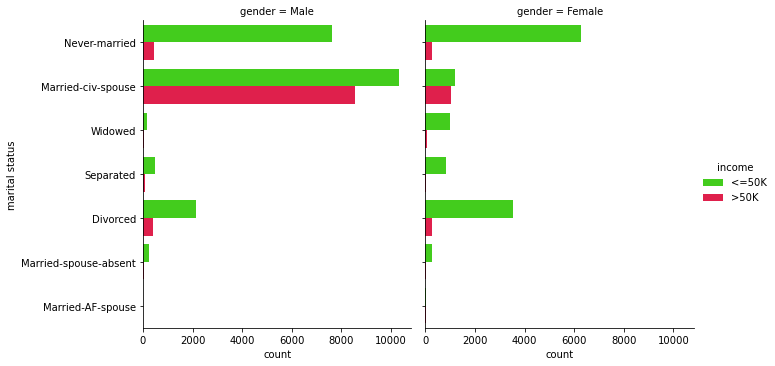

In [113]:
plt.figure(figsize = (8,8))
sns.catplot(y = 'marital status', hue = 'income', col = 'gender', data = Salary, palette = 'prism', kind = 'count')

#### For the male gender the Married-civ-spouse account for majority of those who earn 50K and below as well as above 50K,followed by the Never-married sub category. For the female gender The Never-married sub marital category account for the highest number of 50K or below earners, while the Married-civ-spouse account for the highest number of above 50K earners

### Income by Occupation and Gender

<Figure size 720x720 with 0 Axes>

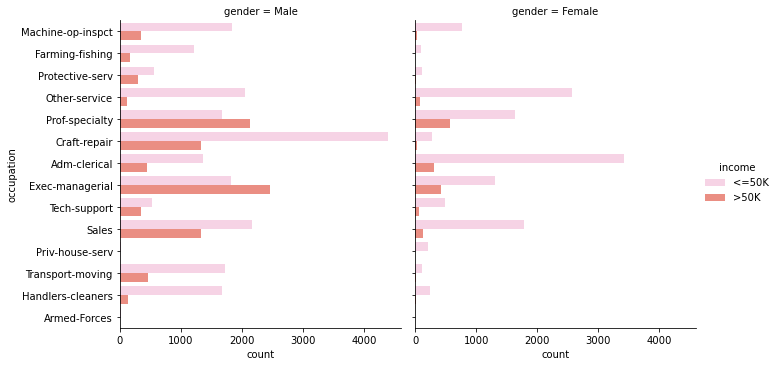

In [115]:
plt.figure(figsize = (10,10))
sns.catplot(y = 'occupation', hue = 'income', col = 'gender', kind = 'count', data = Salary, palette = 'Set3_r')

#### Majority of the males earning 50K or less are in the craft and repairs sub-group, while the highest earners are more in the Prof sub-group. Majority of the women who earn 50K or less annually are in the admin/clerical sub-group, closely followed by those in other-service. Their highest earners are in the Prof sub-group.
#### Interestingly there are more women earning 50K or less in the Prof group than those who earn above, compared to the men in the same sub-group where the opposite is the case. 

### Data Preprocessing

In [11]:
Salary.drop(['education rank', 'country', 'relationship'], axis = 1, inplace = True)


#### The 'education rank' variable is dropped since they correlate with the 'education' variable. Instead we'll recode the variable as integers

In [12]:
Salary.head(5)

,age,workclass,Final Weight,education,marital status,occupation,race,gender,capital gain,capital loss,HPW,income
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Black,Male,0,0,40,<=50K
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,White,Male,0,0,50,<=50K
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,White,Male,0,0,40,>50K
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,0,40,>50K
5,34,Private,198693,10th,Never-married,Other-service,White,Male,0,0,30,<=50K


### Hard coding of categorical variables

In [13]:
### We proceed to code the various categorical variables
ed = set(Salary['education'])
wc = set(Salary['workclass'])
ms = set(Salary['marital status'])
occ = set(Salary['occupation'])
#rel = set(Salary['relationship'])
gen = set(Salary['gender'])
inc = set(Salary['income'])
race = set(Salary['race'])

In [14]:
print(ed)

Salary['education'] = Salary['education'].map({'Preschool': 0, '1st-4th': 1, '5th-6th': 2, '7th-8th': 3,
                                              '9th': 4, '10th': 5, '11th': 6, '12th': 7, 'HS-grad': 8,
                                              'Some-college': 9, 'Assoc-voc': 10, 'Assoc-acdm': 11,
                                              'Bachelors': 12, 'Masters': 13, 'Doctorate': 14, 'Prof-school': 15}).astype(int)

{'Prof-school', '5th-6th', 'Doctorate', 'Some-college', '10th', '7th-8th', '1st-4th', 'Preschool', 'Bachelors', 'Masters', '12th', '11th', 'HS-grad', 'Assoc-voc', '9th', 'Assoc-acdm'}


In [15]:
print(wc)

Salary['workclass'] = Salary['workclass'].map({'Without-pay': 0, 'Self-emp-not-inc': 1, 'Self-emp-inc': 2,
                                              'Local-gov': 3, 'State-gov': 4, 'Federal-gov': 5, 'Private': 6}).astype(int)

{'Private', 'Local-gov', 'Self-emp-not-inc', 'Self-emp-inc', 'State-gov', 'Without-pay', 'Federal-gov'}


In [16]:
print(ms)

Salary['marital status'] = Salary['marital status'].map({'Never-married': 0, 'Separated': 1, 'Divorced': 2,
                                                        'Widowed': 3, 'Married-spouse-absent': 4, 'Married-civ-spouse': 5,
                                                        'Married-AF-spouse': 6}).astype(int)

{'Separated', 'Married-civ-spouse', 'Widowed', 'Never-married', 'Married-spouse-absent', 'Divorced', 'Married-AF-spouse'}


In [17]:
print(occ)

Salary['occupation'] = Salary['occupation'].map({'Other-service': 0, 'Craft-repair': 1, 'Priv-house-serv': 2,
                                                'Handlers-cleaners': 3, 'Farming-fishing': 4, 'Adm-clerical': 5,
                                                'Transport-moving': 6, 'Machine-op-inspct': 7, 'Sales': 8, 'Armed-Forces': 9,
                                                'Tech-support': 10, 'Protective-serv': 11, 'Exec-managerial': 12,
                                                'Prof-specialty': 13}).astype(int)

{'Exec-managerial', 'Adm-clerical', 'Tech-support', 'Sales', 'Other-service', 'Farming-fishing', 'Protective-serv', 'Transport-moving', 'Priv-house-serv', 'Armed-Forces', 'Machine-op-inspct', 'Craft-repair', 'Prof-specialty', 'Handlers-cleaners'}


In [19]:
#print(rel)

#Salary['relationship'] = Salary['relationship'].map({'Not-in-family': 0, 'Other-relative': 1, 'Unmarried': 2,
#                                                    'Own-child': 3, 'Wife': 4, 'Husband': 5}).astype(int)

In [18]:
print(gen)

Salary['gender'] = Salary['gender'].map({'Female': 0, 'Male': 1}).astype(int)

{'Female', 'Male'}


In [19]:
print(inc)

Salary['income'] = Salary['income'].map({'<=50K': 0, '>50K': 1}).astype(int)

{'>50K', '<=50K'}


In [20]:
print(race)

Salary['race'] = Salary['race'].map({'Other': 0, 'Amer-Indian-Eskimo': 1, 'Asian-Pac-Islander': 2, 'Black': 3,
                                    'White': 4}).astype(int)

{'White', 'Black', 'Other', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo'}


In [21]:
Salary.head(5)

,age,workclass,Final Weight,education,marital status,occupation,race,gender,capital gain,capital loss,HPW,income
0,25,6,226802,6,0,7,3,1,0,0,40,0
1,38,6,89814,8,5,4,4,1,0,0,50,0
2,28,3,336951,11,5,11,4,1,0,0,40,1
3,44,6,160323,9,5,7,3,1,7688,0,40,1
5,34,6,198693,5,0,0,4,1,0,0,30,0


In [22]:
Salary.tail(5)

,age,workclass,Final Weight,education,marital status,occupation,race,gender,capital gain,capital loss,HPW,income
48837,27,6,257302,11,5,10,4,0,0,0,38,0
48838,40,6,154374,8,5,7,4,1,0,0,40,1
48839,58,6,151910,8,3,5,4,0,0,0,40,0
48840,22,6,201490,8,0,5,4,1,0,0,20,0
48841,52,2,287927,8,5,12,4,0,15024,0,40,1


### Correlation Matrix of the new data

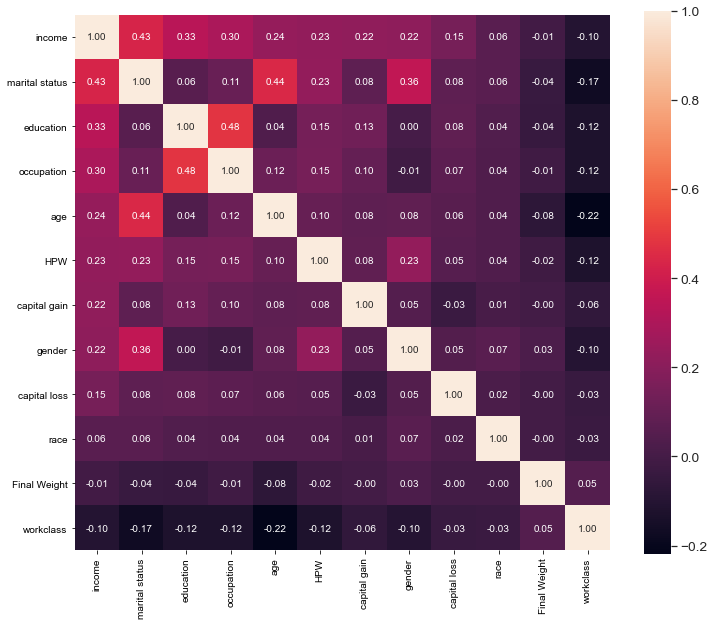

In [23]:
##Plot another correlation matrix including our new coded variables
corr_matrix = Salary.corr()

f, ax = plt.subplots(figsize = (12,10))
k = 12 ##The number of variables to be used for the heatmap
cols = corr_matrix.nlargest(k, 'income')['income'].index ##The 'income' variable is used as index as it is compared against others
cm = np.corrcoef(Salary[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 10},
                yticklabels = cols.values, xticklabels = cols.values) ##annot prints the values inside the matrix

plt.show()

#### Most of the variables have correlations ranging from weak positive or negative.  However relationship-marital status stands out with a strong correlation of 0.78. This can be attributed to the values used in coding the categorical variables. In any case the 'relationship' variable had to be dropped from the data (This is the reason for the earlier dropping of the variable)

### Prediction using Logistic Regression

In [23]:
Salary.income.value_counts()

0    34014
1    11208
Name: income, dtype: int64

#### This is clearly an imbalanced data therefore we'll employ resampling techinques to give the target variable some 'balance'

In [24]:
from sklearn.utils import resample

Salary_Maj = Salary[Salary['income'] == 0]
Salary_Min = Salary[Salary['income'] == 1]

DOWN_MIN = resample(Salary_Maj, replace = False, n_samples =11208,
                 random_state = 12345)
## replace is set to true in the case of upsampling, if down sampling set replace to False
## set n_samples to match the majority or minority class as the case may be
## the random_state is for reprocubility

## Combine majority class with the upsampled minority class
Salary_new = pd.concat([Salary_Min, DOWN_MIN])

Salary_new['income'].value_counts()

1    11208
0    11208
Name: income, dtype: int64

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import normalize, StandardScaler
##Split the data into train and test sets while stratifying our target variable(because its imbalanced)

X = Salary_new.drop('income', axis = 1)
y = Salary_new['income']

X = normalize(X)
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 30)

print("Size of the train dataset: ", len(X_train))
print("Size of the test dataset: ", len(X_test))

Size of the train dataset:  15691
Size of the test dataset:  6725


In [26]:
##In fitting our logistic model we take into account that this is an unbalanced dataset,
logmodel = LogisticRegression(solver = 'lbfgs', max_iter = 200)

logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [27]:
pred = logmodel.predict(X_test)

print(confusion_matrix(y_test, pred))

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logmodel.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logmodel.score(X_test, y_test)))

[[2634  695]
 [ 829 2567]]
Accuracy of Logistic regression classifier on training set: 0.77
Accuracy of Logistic regression classifier on test set: 0.77


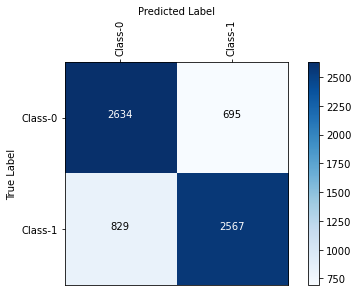

In [28]:
##Plot the Confusion Matrix
import itertools
matrix = confusion_matrix(y_test, pred)

plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')

plt.imshow(matrix, interpolation = 'nearest', cmap = plt.cm.Blues)
plt.colorbar()

fmt = 'd'

thresh = matrix.max()/2.
for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
    plt.text(j, i, format(matrix[i, j], fmt), 
            horizontalalignment = 'center', color = 'white' if matrix[i, j] > thresh else 'black')
    
class_names = ['Class-0', 'Class-1']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation = 90)
plt.yticks(tick_marks, class_names)
plt.tight_layout()
plt.ylabel('True Label', size = 10)
plt.xlabel('Predicted Label', size = 10)
plt.show()

In [29]:
print(classification_report(pred, y_test))


              precision    recall  f1-score   support

           0       0.79      0.76      0.78      3463
           1       0.76      0.79      0.77      3262

    accuracy                           0.77      6725
   macro avg       0.77      0.77      0.77      6725
weighted avg       0.77      0.77      0.77      6725



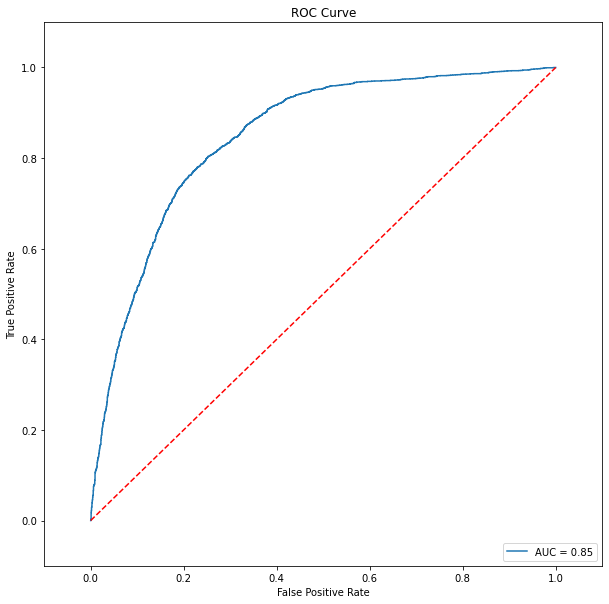

In [30]:
from sklearn import metrics 

pred_prob = logmodel.predict_proba(X_test)

y_preds = pred_prob[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_preds)
auc_score = metrics.auc(fpr, tpr)
#plt.pred_prob()
plt.figure(figsize = (10,10))
plt.title('ROC Curve')
plt.plot(fpr, tpr, label = 'AUC = {:.2f}'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')

plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [31]:
optimal_idx = np.argmax(np.abs(tpr - fpr))
optimal_threshold = _[optimal_idx]
optimal_threshold

0.4721861287851507

In [32]:
gmeans = np.sqrt(tpr * (1 - fpr))
ix = np.argmax(gmeans)
print('Best Threshold = %f, G-mean = %.3f' % (_[ix], gmeans[ix]))

Best Threshold = 0.497332, G-mean = 0.775


Best Threshold = 0.497332, G-mean = 0.775


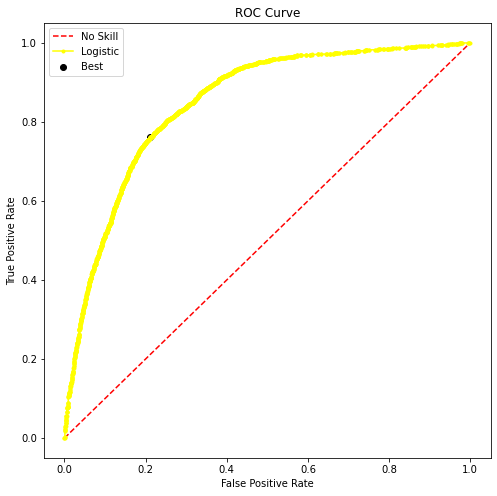

In [33]:
y_preds = pred_prob[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_preds)

ix = np.argmax(gmeans)
print('Best Threshold = %f, G-mean = %.3f' % (_[ix], gmeans[ix]))

##Plot the roc curve for the model
plt.figure(figsize = (8, 8))
plt.plot([0,1], [0,1], linestyle = '--', color = 'red', label = 'No Skill')
plt.plot(fpr, tpr, marker = '.',color = 'yellow', label = 'Logistic')
plt.scatter(fpr[ix], tpr[ix], marker = 'o', color = 'black', label = 'Best')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [34]:
##Tune the hyper-parameters by cross validation
n_splits = 15 ##specify the number of splits

kfold = KFold(n_splits, random_state = 20) ##splits the data set into n folds for evaluation

result = cross_val_score(logmodel, X, y, cv = kfold, scoring = 'accuracy')

##The accuracy of the k-fold cross-validation can be obtained from the mean of the results
print('Accuarcy: %.3f (%.3f)' % (result.mean(), result.std()))

Accuarcy: 0.724 (0.023)


#### The logistic model came out satisfactorily with prediction accuracy of 77% on both the train and test sets, and evaluation of the algorithm us Kfold cross-validation reduced the accuracy  (72.4%). This could be attributed to overfitting in the unevaluated model  

### Decision Trees

In [35]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth = 10)
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [36]:
prediction = tree_model.predict(X_test)


print(confusion_matrix(y_test, prediction))

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(tree_model.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(tree_model.score(X_test, y_test)))

[[2342  987]
 [ 538 2858]]
Accuracy of Logistic regression classifier on training set: 0.83
Accuracy of Logistic regression classifier on test set: 0.77


In [41]:
from sklearn import tree
feature_names = ['age', 'workclass', 'Final Weight', 'education', 'marital status', 'occupation',
                'race', 'gender', 'capital gain', 'capital loss', 'HPW']

cn = ['<=50K', '>50K']

#fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8), dpi = 300)
#tree.plot_tree(tree_model, feature_names = feature_names, class_names = cn, filled = True)
#plt.show()

In [37]:
print(classification_report(prediction, y_test))

              precision    recall  f1-score   support

           0       0.70      0.81      0.75      2880
           1       0.84      0.74      0.79      3845

    accuracy                           0.77      6725
   macro avg       0.77      0.78      0.77      6725
weighted avg       0.78      0.77      0.77      6725



#### With Decison trees (with a maximum depth of 10) the model improved significantly with a prediction accuracy of 86% on the test data

### Random Forests

In [38]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state =0, n_jobs = -1, n_estimators = 20, class_weight = 'balanced').fit(X_train, y_train)

pred2 = clf.predict(X_test)

print(confusion_matrix(y_test, pred2))

print('Accuracy of RandomForest classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RandomForest classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

[[2659  670]
 [ 708 2688]]
Accuracy of RandomForest classifier on training set: 1.00
Accuracy of RandomForest classifier on test set: 0.80


In [39]:
print(classification_report(pred2, y_test))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      3367
           1       0.79      0.80      0.80      3358

    accuracy                           0.80      6725
   macro avg       0.80      0.80      0.80      6725
weighted avg       0.80      0.80      0.80      6725



In [40]:
##Apply kfolds cross_validation
n_splits = 10
kfold1 = KFold(n_splits, random_state = 20)
result1 = cross_val_score(clf, X, y, cv = kfold1, scoring = 'accuracy')
print('Accuarcy: %.3f (%.3f)' % (result1.mean(), result1.std()))

Accuarcy: 0.755 (0.011)


#### The RandomForest model's accuracy on the test data is at 80%. This could be attributed to overfitting because after cross validation the accuracy reduced to 75.5%. Compared with the decision trees model, the model's accuracyon the test set performed marginally less. However the RandomForest model performed better on the train set than the decision trees

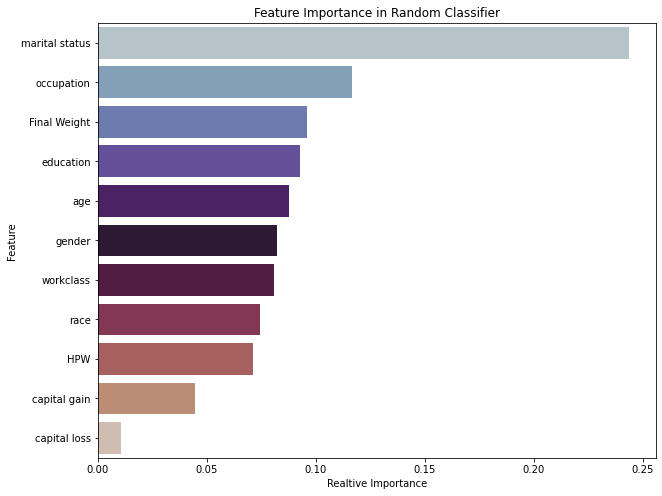

In [42]:
important = clf.feature_importances_

feature_importance = np.array(important)
feature_names = np.array(feature_names)

data = {'feature_names': feature_names, 'feature_importance': important}
df = pd.DataFrame(data)

df.sort_values(by = ['feature_importance'], ascending = False, inplace = True)
#fig, ax = plt.subplots()
plt.figure(figsize = (10, 8))
#plt.bar([x for x in range(len(important))], important)
sns.barplot(x = df['feature_importance'], y = df['feature_names'], palette = 'twilight')
plt.ylabel('Feature')
plt.xlabel('Realtive Importance')
#ax.set_xticklabels(feature_names, minor = False)
plt.title("Feature Importance in Random Classifier")
plt.show()

#### The features that contribute more significantly are marital status, occupation, Final weight, education, age and gender. This is no surprise.

### K-Nearest Neighbor

In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn_class = KNeighborsClassifier(n_neighbors = 22).fit(X_train, y_train)
knn_pred = knn_class.predict(X_test)

print('Accuracy of KNN Classifier on training set: {:.2f}'
     .format(knn_class.score(X_train, y_train)))
print('Accuracy of KNN Classifier on test set: {:.2f}'
     .format(knn_class.score(X_test, y_test)))
print(confusion_matrix(knn_pred, y_test))

print(classification_report(knn_pred, y_test))

Accuracy of KNN Classifier on training set: 0.81
Accuracy of KNN Classifier on test set: 0.80
[[2506  542]
 [ 823 2854]]
              precision    recall  f1-score   support

           0       0.75      0.82      0.79      3048
           1       0.84      0.78      0.81      3677

    accuracy                           0.80      6725
   macro avg       0.80      0.80      0.80      6725
weighted avg       0.80      0.80      0.80      6725



Text(0, 0.5, 'Accuarcy Rate')

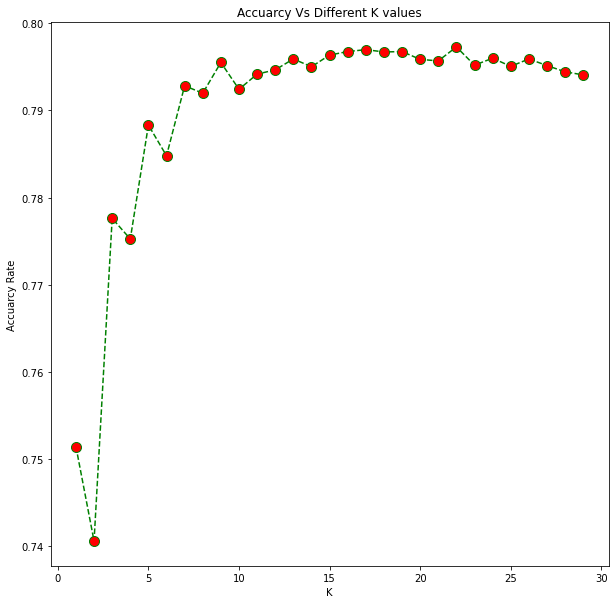

In [44]:
accrate = list()

for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(knn, X, y, cv = 10)
    accrate.append(score.mean())


plt.figure(figsize = (10,10))
plt.plot(range(1, 30), accrate, color = 'green', linestyle = 'dashed', marker = 'o',
        markerfacecolor = 'red', markersize = 10)

plt.title('Accuarcy Vs Different K values')
plt.xlabel('K')
plt.ylabel('Accuarcy Rate')

#### The above plot of Accuracy Rate against different K values, from which we can deduce that the k value that most minimizes the cross validation error is 22, we can now go back to the previous code and run again but this time with the 'n_neighbors' parameter set at 22